
## **Especialização em Inteligência Artificial – IFMG**

### Análise de Séries Temporais

### **Lista de exercícios:  02**

**Aluno:** Christhian Gonçalves

**Professor:** Carlos Severiano

### EX01

A série ilustrada abaixo, feita pelo IBGE, demonstra o volume de vendas mensal no Brasil. Ela está disponível no arquivo vendas_brasil.csv, em anexo a esta atividade, e também pode ser obtida em diferentes formatos no endereço: https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html?=&amp;t=series-historicas

Realize uma análise e decomposição da série a partir dos passos definidos em a e b.

#### **a. Roteiro 1:**

i. Estimar tendência através de ajuste exponencial

ii. Eliminar a tendência estimada

iii. Estimar a sazonalidade através de médias móveis

iv. Eliminar a sazonalidade

v. Analisar o resíduo para verificar se pertence a uma distribuição iid



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy import stats

df = pd.read_csv('vendas_brasil.csv')
df['Mês'] = pd.to_datetime(df['Mês'], format='%d/%m/%y')
df.head()

,Mês,Brasil
0,2000-01-01,46.56262
1,2000-02-01,47.08777
2,2000-03-01,49.10081
3,2000-04-01,49.10081
4,2000-05-01,51.11386


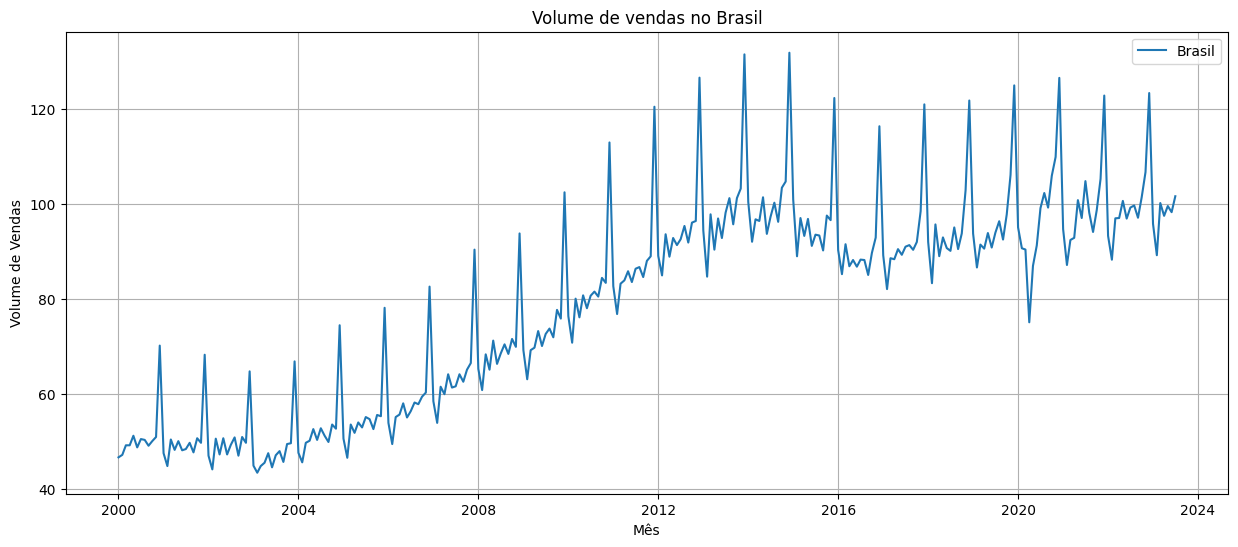

In [216]:
plt.figure(figsize=(15, 6))
plt.plot(df['Mês'], df['Brasil'], label='Brasil')
plt.title('Volume de vendas no Brasil')
plt.xlabel('Mês')
plt.ylabel("Volume de Vendas")
plt.grid(True)
plt.legend()

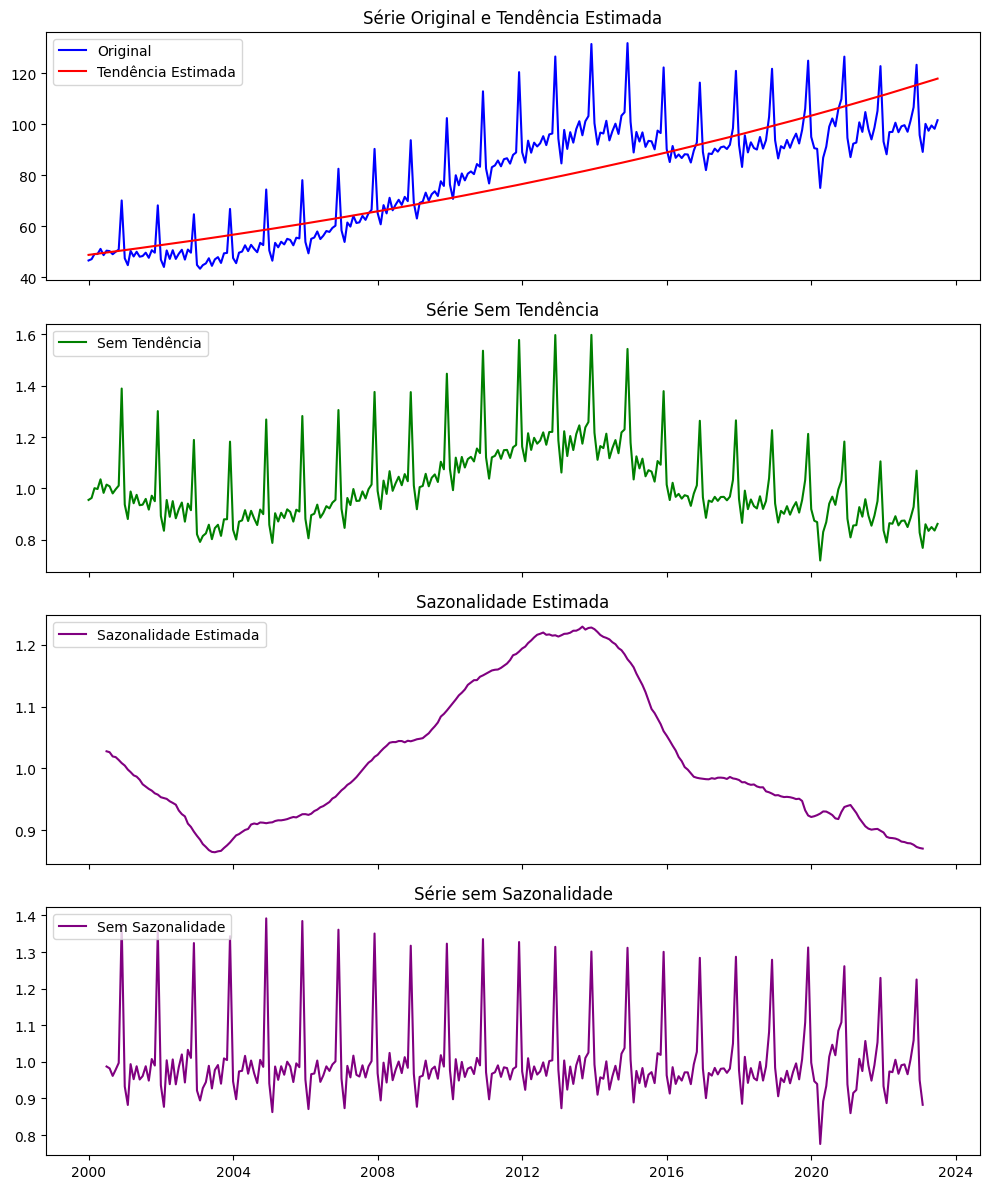

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df.set_index('Mês', inplace=True)
df = df.asfreq('MS')

# 1: Estimar tendência através de ajuste exponencial (regressão)
# Aplicar log para estabilizar a variância
df['Log_Brasil'] = np.log(df['Brasil'])

# Ajustar modelo exponencial
time = np.arange(len(df))
model_trend = np.polyfit(time, df['Log_Brasil'], 1)
trend_exp = np.exp(model_trend[1] + model_trend[0] * time)

# 2: Eliminar a tendência estimada
df['Detrended'] = df['Brasil'] / trend_exp

# 3: Estimar sazonalidade através de médias móveis (janela de 12 meses)
df['Seasonal'] = df['Detrended'].rolling(window=12, center=True).mean()

# 4: Eliminar a sazonalidade
df['Deseasonalized'] = df['Detrended'] / df['Seasonal']


# Visualizar resultados do Roteiro 1
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
axes[0].plot(df.index, df['Brasil'], label='Original', color='blue')
axes[0].plot(df.index, trend_exp, label='Tendência Estimada', color='red')
axes[0].legend(loc='upper left')
axes[0].set_title('Série Original e Tendência Estimada')

axes[1].plot(df.index, df['Detrended'], label='Sem Tendência', color='green')
axes[1].legend(loc='upper left')
axes[1].set_title('Série Sem Tendência')

axes[2].plot(df.index, df['Seasonal'], label='Sazonalidade Estimada', color='purple')
axes[2].legend(loc='upper left')
axes[2].set_title('Sazonalidade Estimada')

axes[3].plot(df.index, df['Deseasonalized'], label='Sem Sazonalidade', color='purple')
axes[3].legend(loc='upper left')
axes[3].set_title('Série sem Sazonalidade')


plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

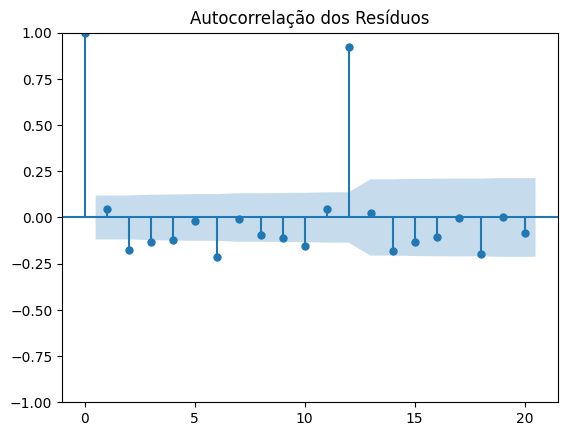

In [ ]:
#  5: Analisar resíduos

residuo = df['Deseasonalized'].dropna()

# Gráfico de autocorrelação
plt.figure(figsize=(12, 6))
plot_acf(residuo, lags=20)
plt.title('Autocorrelação dos Resíduos')
plt.show()

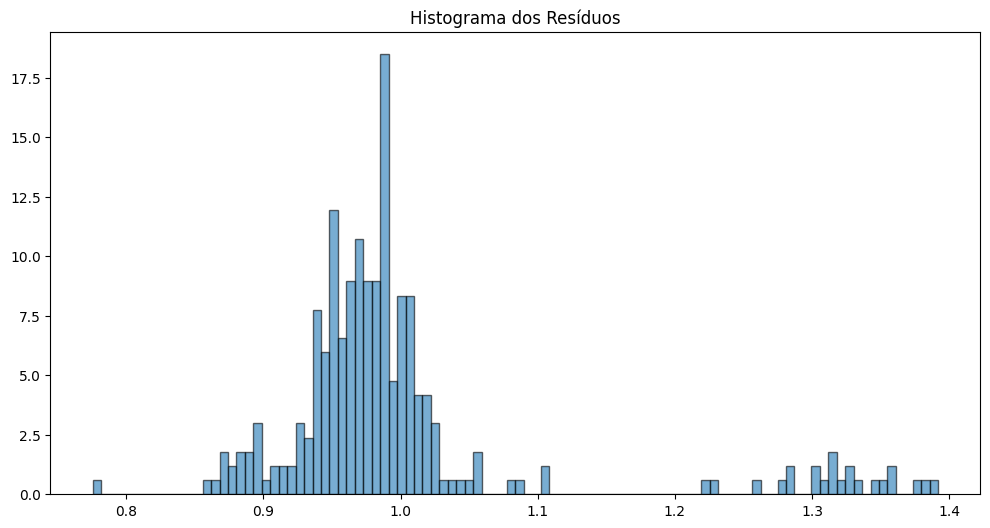

In [ ]:
# Histograma dos resíduos
plt.figure(figsize=(12, 6))
plt.hist(residuo, bins=100, edgecolor='k', density=True, alpha=0.6)
plt.title('Histograma dos Resíduos')
plt.show()

In [ ]:
from scipy.stats import shapiro, normaltest, jarque_bera

# Testes de normalidade
print("Testes de Normalidade:")
print(f"Shapiro-Wilk: {shapiro(residuo)}")  # Ideal se p-valor > 0.05
print(f"D’Agostino e Pearson: {normaltest(residuo)}")  # Ideal se p-valor > 0.05
print(f"Jarque-Bera: {jarque_bera(residuo)}")  # Ideal se p-valor > 0.05

Testes de Normalidade:
Shapiro-Wilk: ShapiroResult(statistic=0.6860420787993884, pvalue=3.397468294986552e-22)
D’Agostino e Pearson: NormaltestResult(statistic=138.40533139683723, pvalue=8.823972667222333e-31)
Jarque-Bera: SignificanceResult(statistic=514.0796689436025, pvalue=2.3389355753070555e-112)


**Conclusão:** Todos os testes de normalidade (Shapiro-Wilk, D’Agostino e Pearson, e Jarque-Bera) mostram p-valores muito baixos, indicando que a hipótese de que os resíduos seguem uma distribuição normal deve ser rejeitada. Isso sugere que os resíduos não são normalmente distribuídos. Os resíduos apresentam autocorrelação significativa (valores de ACF fora do intervalo de confiança ou p-valor do teste Ljung-Box menor que 0,05), isso indica que os resíduos não são independentes.

#### **b. Roteiro 2:**

i. Eliminar a tendência através de diferenciação

ii. Eliminar a sazonalidade através de diferenciação

iii. Analisar o resíduo para verificar se pertence a uma distribuição iid

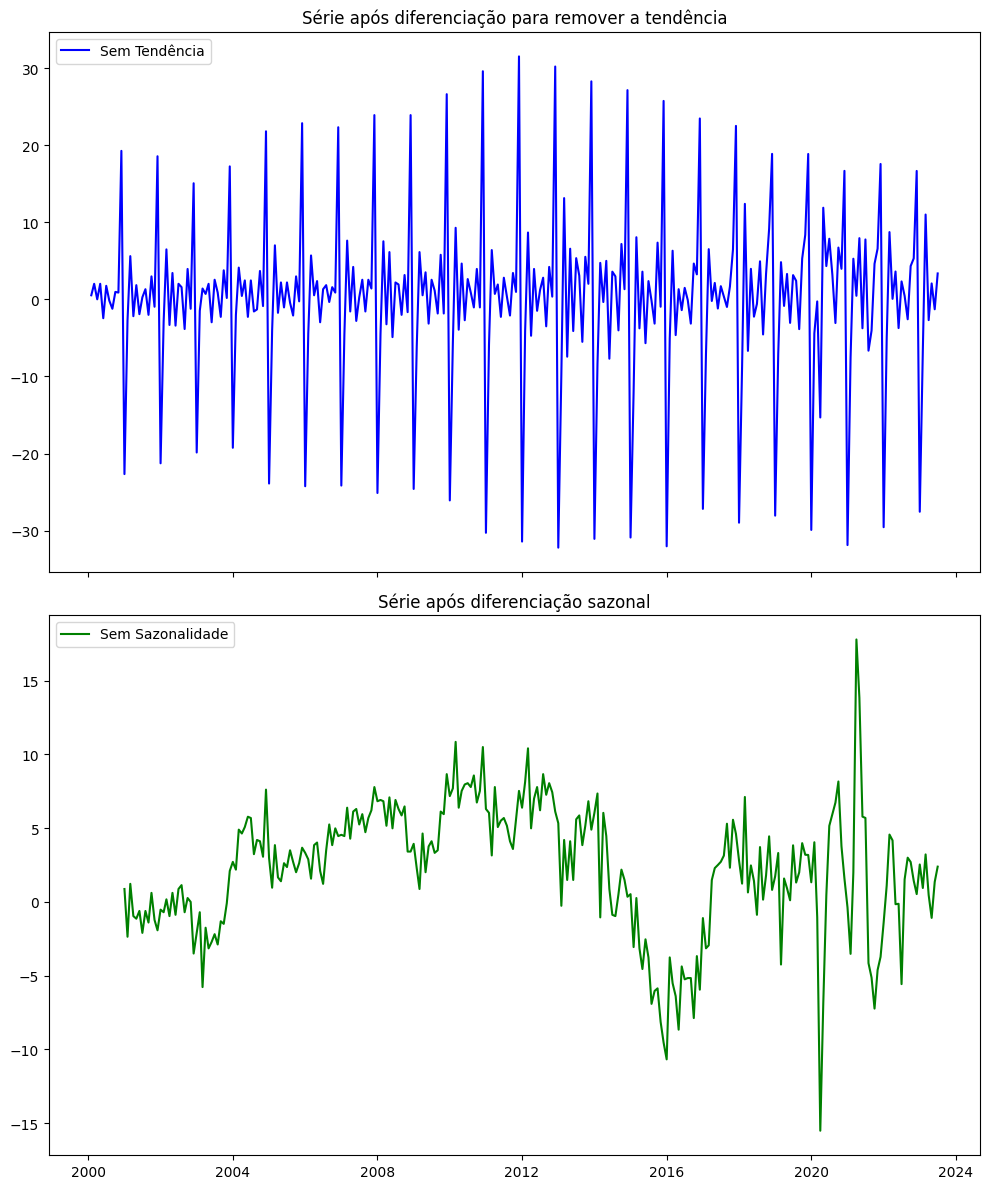

In [ ]:
# 1: Diferenciação para remover a tendência
serie_dif_tendencia = df['Brasil'].diff().dropna()

# 2: Diferenciação sazonal para remover a sazonalidade (supondo sazonalidade anual com m=12)
serie_dif_sazonal = df['Brasil'].diff(12).dropna()

# Visualizar resultados do Roteiro 1 e 2
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
axes[0].plot(serie_dif_tendencia , label='Sem Tendência', color='blue')
axes[0].legend(loc='upper left')
axes[0].set_title('Série após diferenciação para remover a tendência')

axes[1].plot(serie_dif_sazonal, label='Sem Sazonalidade', color='green')
axes[1].legend(loc='upper left')
axes[1].set_title('Série após diferenciação sazonal')


plt.tight_layout()
plt.show()



Shapiro-Wilk p-value: 8.282599571805972e-05
Ljung-Box:         lb_stat      lb_pvalue
40  1109.432103  1.436271e-206


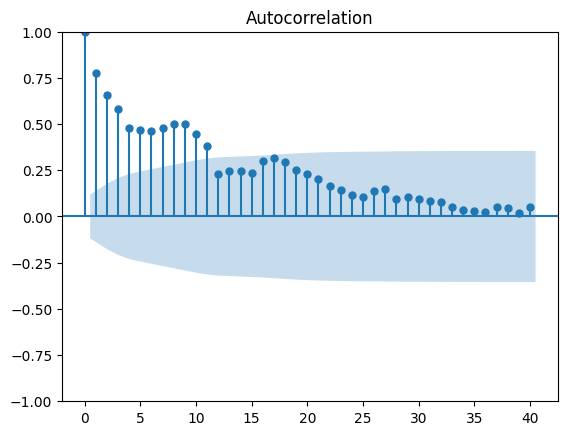

In [ ]:
# 3: Analisar o resíduo para verificar se pertence a uma distribuição iid
# resíduos da série após remoção da tendência e sazonalidade
residuos = serie_dif_sazonal - serie_dif_sazonal.mean()

# 1. ACF - Análise de Autocorrelação dos Resíduos
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos, lags=40)

# 2. Teste de Normalidade (Shapiro-Wilk)
from scipy.stats import shapiro
stat, p_value = shapiro(residuos)
print(f"Shapiro-Wilk p-value: {p_value}")

# 3. Teste de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuos, lags=[40], return_df=True)
print(f"Ljung-Box: {ljung_box}")


 **Conclusão:** Shapiro-Wilk o p-valor abaixo de 0,05, a série dos resíduos não é normalmente distribuída. Ljung-Box o p-valor abaixo de 0,05, a presença de autocorrelação significativa nos resíduos sugere que os resíduos não são independentes.

#### A partir da análise das séries decompostas, avalie se algum dos modelos é adequado para representar a série.

R: A série pode ser representada por um modelo ARIMA, mas ajustes são necessários para lidar com a autocorrelação e a não-normalidade dos resíduos.

### EX02
Utilize novamente a série vendas_brasil para testar um mecanismo de previsão. Trata-se de um mecanismo mais simplificado, que terá como base a tendência estimada por uma regressão linear. Realize os seguintes passos:

a. Estime a tendência utilizando regressão linear. Em python, utilize a função fit()
do módulo Linear Regression
(https://www.statsmodels.org/stable/regression.html)

b. Elimine a tendência com o valor estimado pela regressão linear

c. Estime a sazonalidade através das médias móveis

d. Elimine a sazonalidade

e. Utilize a função predict() do modelo de regressão linear para gerar a reta de tendência para todos os índices da série

f. Adicione a tendência estimada à sazonalidade

g. Adicione ao resultado um ruído de média zero

h. Compare em um mesmo gráfico a série original e a série prevista

C:\Users\chris\AppData\Local\Temp\ipykernel_25616\3736544268.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('vendas_brasil.csv', parse_dates=['Mês'], dayfirst=True)


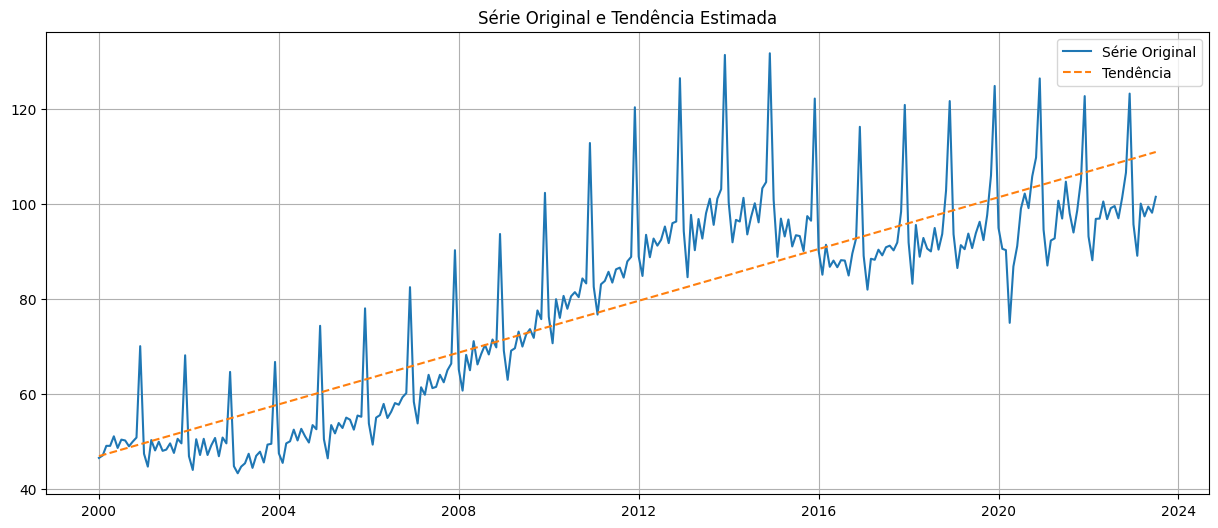

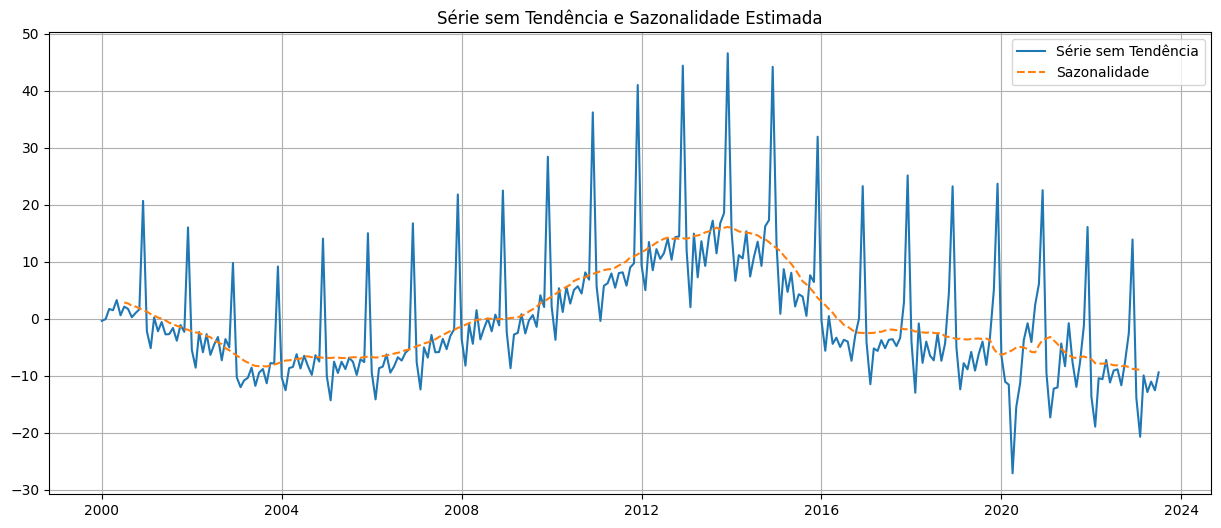

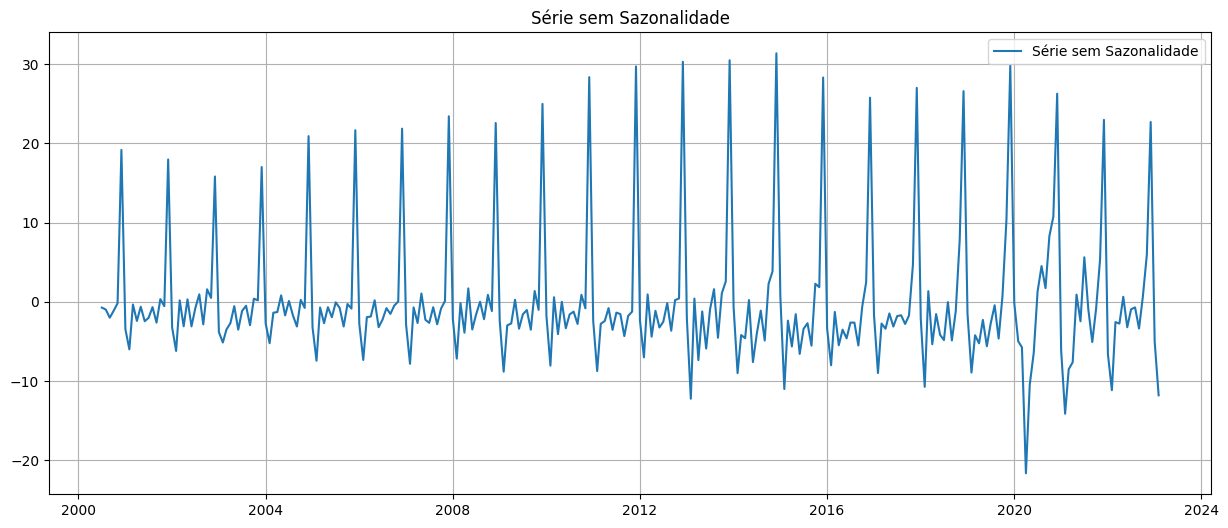

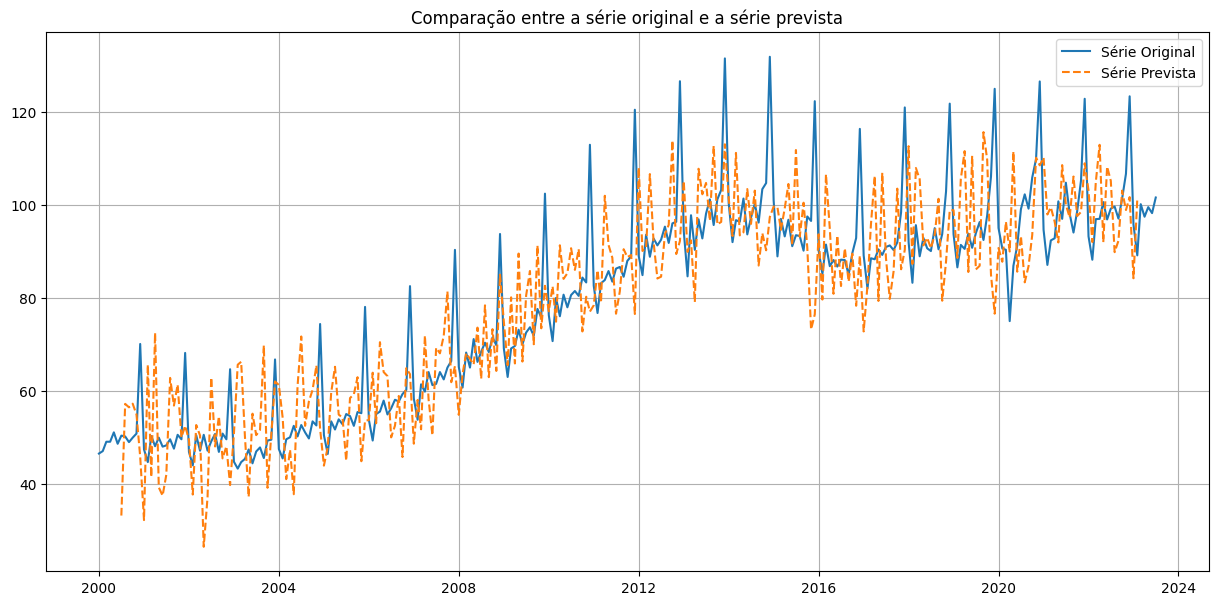

In [230]:
import statsmodels.api as sm

# Carregando os dados
df = pd.read_csv('vendas_brasil.csv', parse_dates=['Mês'], dayfirst=True)
df.set_index('Mês', inplace=True)

# a. Estime a tendência utilizando regressão linear.
X = np.arange(len(df)).reshape(-1, 1)  # Cria uma variável independente baseada no índice da série
X = sm.add_constant(X)
y = df['Brasil'].values
model = sm.OLS(y, X).fit()

# b. Elimine a tendência com o valor estimado pela regressão linear
df['Tendência'] = model.predict(X)
df['Sem_Tendência'] = df['Brasil'] - df['Tendência']

# Plotando a série original e a tendência estimada
plt.figure(figsize=(15, 6))
plt.plot(df['Brasil'], label='Série Original')
plt.plot(df['Tendência'], label='Tendência', linestyle='--')
plt.legend()
plt.title("Série Original e Tendência Estimada")
plt.grid(True)
plt.show()

# c. Estime a sazonalidade através das médias móveis
# Assumindo sazonalidade mensal, usamos 12 meses
df['Sazonalidade'] = df['Sem_Tendência'].rolling(window=12, center=True).mean()

# Plotando a série sem tendência e a sazonalidade estimada
plt.figure(figsize=(15, 6))
plt.plot(df['Sem_Tendência'], label='Série sem Tendência')
plt.plot(df['Sazonalidade'], label='Sazonalidade', linestyle='--')
plt.legend()
plt.title("Série sem Tendência e Sazonalidade Estimada")
plt.grid(True)
plt.show()

# d. Elimine a sazonalidade
df['Sem_Sazonalidade'] = df['Sem_Tendência'] - df['Sazonalidade']

# Plotando a série sem sazonalidade
plt.figure(figsize=(15, 6))
plt.plot(df['Sem_Sazonalidade'], label='Série sem Sazonalidade')
plt.legend()
plt.title("Série sem Sazonalidade")
plt.grid(True)
plt.show()

# f. Adicione a tendência estimada à sazonalidade
df['Tendência_Sazonalidade'] = df['Tendência'] + df['Sazonalidade']

# g. Adicione ao resultado um ruído de média zero
ruído = np.random.normal(0, df['Sem_Sazonalidade'].std(), len(df))
df['Previsão'] = df['Tendência_Sazonalidade'] + ruído

# h. Compare em um mesmo gráfico a série original e a série prevista
plt.figure(figsize=(15, 7))
plt.plot(df['Brasil'], label='Série Original')
plt.plot(df['Previsão'], label='Série Prevista', linestyle='--')
plt.legend()
plt.title("Comparação entre a série original e a série prevista")
plt.grid(True)
plt.show()